1. Разбор аналитичекского примера вейвлет преобразование с материнским вейвлетом Морле от нестационарного сгнала.

2. Численная реализация вейвлет преобразование с материнским вейвлетом Морле сравнение с аналитикой и разбор нескольких римеров чисто численно с реальным сигналом в конце.
Тестовая попытка обработать реальный сигнал - с записанной реальной дорожки получаются соответствующие аудио частоты.

дан нестационарный сигнал вида:
$$
z(t) = z_1 + z_2
$$

$$
z(t)_L = \frac{b_{L}}{2\tau_{L}\sqrt{\pi}} e^{-\frac{(t-t_{L})^2}{4\tau_{L}^{2}}} \cos{(2\pi f_{L} (t-t_{L}) + \alpha_{L})}
$$

$$
b_{L} = 2\tau_{L}\sqrt{\pi}
$$

$$
\tau_{1} = 0.02,\  \tau_{2} = 0.1
$$

$$
t_{1} = 4,\  t_{2} = 6
$$

$$
f_{L} = 0,\  \alpha_{L} = 0
$$

$$
z(t) = e^{-\frac{(t-4)^2}{0.0016}} + e^{-\frac{(t-6)^2}{0.04}} 
$$


In [1027]:
import numpy as np
import matplotlib.pyplot as plt
import numba as nb
import sympy as sp

In [1028]:
@nb.njit
def signal(t, b, tau, t_L, f_L, alpha_L):
    return b/(2*tau*np.pi**(1/2)) * np.exp(-((t-t_L)**2)/(4*tau**2)) * np.cos(2*np.pi*f_L*(t-t_L)+alpha_L)

In [1029]:
N = 2**16
print(N)

t_int_p = 100
t_int_m = -100

t = np.linspace(t_int_m, t_int_p, N)

z_time = np.zeros((N), dtype=np.float64)
    
z_time = signal(t, 2*0.02*np.pi**(1/2), 0.02, 4, 0, 0) + signal(t, 2*0.1*np.pi**(1/2), 0.1, 6, 0, 0)

z_time_test = np.exp(-(t-4)**2/0.0016) + np.exp(-(t-6)**2/0.04)

65536


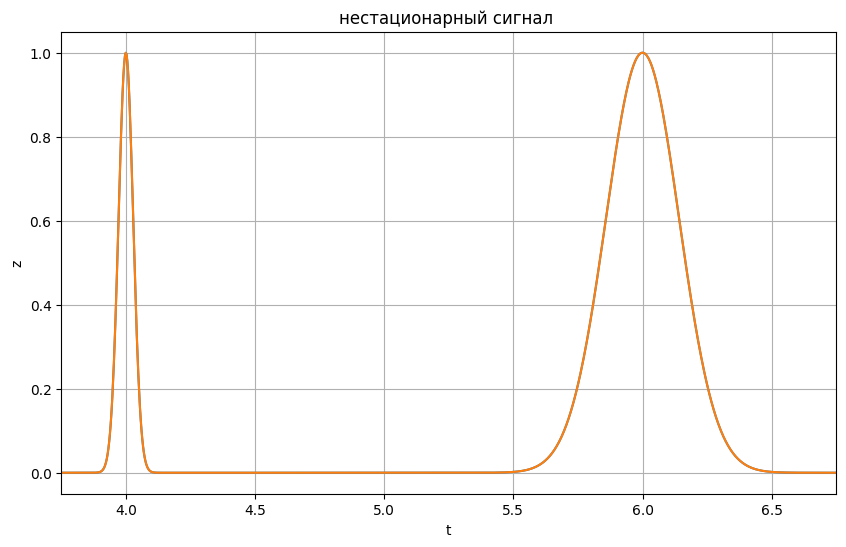

In [1030]:
plt.figure(figsize=(10, 6))
plt.plot(t, z_time)
plt.plot(t,z_time_test)
plt.title("нестационарный сигнал ")
plt.xlabel("t")
plt.ylabel("z")
plt.grid()
plt.xlim(3.75, 6.75)
plt.show()

Фурье образ в общем виде.
Так как преобразование обладает свойством линейности достаточно найти образ одного слагаемого.

Перепишем выражение в более удобной форме:

$$
a = \frac{b_{L}}{2\tau_{L}\sqrt{\pi}}, \ \mu = t_{L}, \ b = 2\tau_{L}, \ \omega = 2\pi f_{L}, \ \alpha = \alpha_{L}
$$
$$
z(t) = a e^{-\frac{(t-\mu)^2}{b^2}} \cos{(\omega (t - \mu) + \alpha)}
$$

$$
\cos{(x)} = \frac{1}{2}(e^{ix} + e^{-ix})
$$

$$
z(t) = \frac{a}{2} e^{-\frac{(t-\mu)^2}{b^2}} (e^{i(\omega (t - \mu) + \alpha)} + e^{-i(\omega (t - \mu) + \alpha)})
$$

$$
z(t) = \frac{a}{2} \left( e^{-\frac{(t-\mu)^2}{b^2} + i(\omega (t - \mu) + \alpha)} + e^{-\frac{(t-\mu)^2}{b^2} - i(\omega (t - \mu) + \alpha)} \right)
$$

$$
\mathcal{F}[z(t)] = 
\frac{a}{2} \int\limits_{-\infty}^{\infty}dt\ e^{-\frac{(t-\mu)^2}{b^2} + i(\omega (t - \mu) + \alpha)} e^{-i\Omega t} + 
\frac{a}{2} \int\limits_{-\infty}^{\infty}dt\ e^{-\frac{(t-\mu)^2}{b^2} - i(\omega (t - \mu) + \alpha)} e^{-i\Omega t}
$$

$$
\mathcal{F}[z(t)] = 
\frac{a}{2} \int\limits_{-\infty}^{\infty}dt\ e^{-\frac{(t-\mu)^2}{b^2} + i(\omega (t - \mu) + \alpha) -i\Omega t} + 
\frac{a}{2} \int\limits_{-\infty}^{\infty}dt\ e^{-\frac{(t-\mu)^2}{b^2} - i(\omega (t - \mu) + \alpha) -i\Omega t}
$$


выделяем полный квадрат и выносим за интеграл константы переходя к новому дифференциалу $d(t-\mu)$
$$
\mathcal{F}[z(t)] = 

\frac{a}{2} \int\limits_{-\infty}^{\infty}d(t-\mu)\ e^{-\frac{(t-\mu)^2}{b^2} + i(\omega (t - \mu) + \alpha) -i\Omega(t-\mu+\mu)} + 

\frac{a}{2} \int\limits_{-\infty}^{\infty}d(t-\mu)\ e^{-\frac{(t-\mu)^2}{b^2} - i(\omega (t - \mu) + \alpha) -i\Omega (t-\mu+\mu)}
$$

$$
\mathcal{F}[z(t)] = 

\frac{a}{2} e^{i(\alpha - \Omega \mu)} \int\limits_{-\infty}^{\infty}d(t-\mu)\ e^{-\frac{(t-\mu)^2}{b^2} + i\omega (t - \mu) -i\Omega(t-\mu)} + 

\frac{a}{2} e^{-i(\alpha + \Omega \mu)} \int\limits_{-\infty}^{\infty}d(t-\mu)\ e^{-\frac{(t-\mu)^2}{b^2} - i\omega (t - \mu) -i\Omega (t-\mu)}
$$

$$
\mathcal{F}[z(t)] = 

\frac{a}{2} e^{i(\alpha - \Omega \mu)} \int\limits_{-\infty}^{\infty}d(t-\mu)\ 

e^{-\left(\frac{(t-\mu)^2}{b^2} - i\omega (t - \mu) + i\Omega(t-\mu) \right)} + 

\frac{a}{2} e^{-i(\alpha + \Omega \mu)} \int\limits_{-\infty}^{\infty}d(t-\mu)\ 

e^{-\left(\frac{(t-\mu)^2}{b^2} + i\omega (t - \mu) + i\Omega (t-\mu) \right)}
$$

$$
\mathcal{F}[z(t)] = 

\frac{a}{2} e^{i(\alpha - \Omega \mu)} \int\limits_{-\infty}^{\infty}d(t-\mu)\ 

e^{-\left(\frac{(t-\mu)^2}{b^2} + i(\Omega - \omega) (t-\mu) \right)} + 

\frac{a}{2} e^{-i(\alpha + \Omega \mu)} \int\limits_{-\infty}^{\infty}d(t-\mu)\ 

e^{-\left(\frac{(t-\mu)^2}{b^2} + i(\omega + \Omega )(t-\mu) \right)}
$$

И окончательно применяя табличные формулы получаем ответ для фурье образа соответствующего сигнала:
$$
\int\limits_{-\infty}^{\infty}dx e^{-(ax^2+bx+c )} = \sqrt{\frac{\pi}{a}}e^{\frac{b^2}{4a}-c}
$$

$$
\mathcal{F}[z(t)] = 

\frac{ab}{2}\sqrt{\pi} e^{i(\alpha - \Omega \mu) -b^2\frac{(\Omega - \omega)^2}{4}} + 

\frac{ab}{2}\sqrt{\pi} e^{-i(\alpha + \Omega \mu) -b^2\frac{(\Omega + \omega)^2}{4}} 
$$

в исходных обозначениях:
$$
a = \frac{b_{L}}{2\tau_{L}\sqrt{\pi}}, \ \mu = t_{L}, \ b = 2\tau_{L}, \ \omega = 2\pi f_{L}, \ \alpha = \alpha_{L}
$$
$$
\mathcal{F}[z(t)] = 

\frac{b_{L}}{2\tau_{L}\sqrt{\pi}} \frac{2\tau_{L}}{2}\sqrt{\pi} e^{i(\alpha_{L} - \Omega t_{L}) -4\tau_{L}^2\frac{(\Omega - 2\pi f_{L})^2}{4}} + 

\frac{b_{L}}{2\tau_{L}\sqrt{\pi}} \frac{2\tau_{L}}{2}\sqrt{\pi} e^{-i(\alpha_{L} + \Omega t_{L}) -4\tau_{L}^2\frac{(\Omega + 2\pi f_{L})^2}{4}} 
$$

$$
\mathcal{F}[z(t)] = 

\frac{b_{L}}{2} e^{ i(\alpha_{L} - \Omega t_{L}) -\tau_{L}^2(\Omega - 2\pi f_{L})^2} + 

\frac{b_{L}}{2} e^{-i(\alpha_{L} + \Omega t_{L}) -\tau_{L}^2(\Omega + 2\pi f_{L})^2} 
$$

Спектр мощности для случая из примера:
можно получить либо из выведенной формулы и свойства линейности либо пользуясь свойствами о масштабировании и сдвиге.
$$
z(t) = e^{-\frac{(t-4)^2}{0.0016}} + e^{-\frac{(t-6)^2}{0.04}} 
$$

$$
\mathcal{F}[z(t)] = \frac{1}{25} \sqrt{\pi} e^{-i 4 \Omega} e^{- \frac{\Omega^2}{4*625}} +
                     \frac{1}{5} \sqrt{\pi} e^{-i 6 \Omega} e^{- \frac{\Omega^2}{4*25}}
$$
$$
\tau_{1} = 0.02,\  \tau_{2} = 0.1
$$
$$
b_{L} = 2\tau_{L}\sqrt{\pi}
$$
$$
\mathcal{F}[z(t)] = 

\frac{b_{L}}{2} e^{ i(0 - \Omega 4) -0.02^2(\Omega - 0)^2} + 

\frac{b_{L}}{2} e^{-i(0 + \Omega 4) -0.02^2(\Omega + 0)^2} +

\frac{b_{L}}{2} e^{ i(0 - \Omega 6) -0.1^2(\Omega - 0)^2} + 

\frac{b_{L}}{2} e^{-i(0 + \Omega 6) -0.1^2(\Omega + 0)^2}
$$
$$
\mathcal{F}[z(t)] = 

0.02\sqrt{\pi} e^{ -i(4\Omega) -0.02^2(\Omega)^2} + 

0.02\sqrt{\pi} e^{-i(4\Omega) -0.02^2(\Omega)^2} +

0.1\sqrt{\pi} e^{ -i(6\Omega) -0.1^2(\Omega)^2} + 

0.1\sqrt{\pi} e^{-i(6\Omega) -0.1^2(\Omega)^2}
$$

$$
\mathcal{F}[z(t)] = 

0.04\sqrt{\pi} e^{ -i(4\Omega) -0.02^2(\Omega)^2} + 

0.2\sqrt{\pi} e^{ -i(6\Omega) -0.1^2(\Omega)^2}  
$$

искомый спектр мощности:
$$
\mathcal{F}[z(t)]\mathcal{F}^*[z(t)] = 

(0.04\sqrt{\pi} e^{ -i(4\Omega) -0.02^2(\Omega)^2} + 

0.2\sqrt{\pi} e^{ -i(6\Omega) -0.1^2(\Omega)^2}) 
$$

$$
(0.04\sqrt{\pi} e^{ i(4\Omega) -0.02^2(\Omega)^2} + 

0.2\sqrt{\pi} e^{ i(6\Omega) -0.1^2(\Omega)^2}) =
$$

$$
0.04\sqrt{\pi} e^{ -i(4\Omega) -0.02^2(\Omega)^2}0.2\sqrt{\pi} e^{ i(6\Omega) -0.1^2(\Omega)^2} + 

0.04\sqrt{\pi} e^{ -i(4\Omega) -0.02^2(\Omega)^2}0.04\sqrt{\pi} e^{ i(4\Omega) -0.02^2(\Omega)^2} +
$$

$$
0.2\sqrt{\pi} e^{ -i(6\Omega) -0.1^2(\Omega)^2}0.04\sqrt{\pi} e^{ i(4\Omega) -0.02^2(\Omega)^2} +

0.2\sqrt{\pi} e^{ -i(6\Omega) -0.1^2(\Omega)^2}0.2\sqrt{\pi} e^{ i(6\Omega) -0.1^2(\Omega)^2} = 
$$

$$
0.008\pi e^{ -i(4\Omega) -0.02^2(\Omega)^2 + i(6\Omega) -0.1^2(\Omega)^2} +

0.0016\pi e^{ -i(4\Omega) -0.02^2(\Omega)^2 + i(4\Omega) -0.02^2(\Omega)^2} +
$$

$$
0.008\pi e^{ -i(6\Omega) -0.1^2(\Omega)^2 + i(4\Omega) -0.02^2(\Omega)^2} +

0.04\pi e^{ -i(6\Omega) -0.1^2(\Omega)^2 + i(6\Omega) -0.1^2(\Omega)^2} = 
$$

$$
0.008\pi e^{-(0.0004+0.01)(\Omega)^2 + i(2\Omega)} +

0.0016\pi e^{-0.0008(\Omega)^2} +

0.008\pi e^{ -i(2\Omega) -(0.01+0.0004)(\Omega)^2} +

0.04\pi e^{   -0.02(\Omega)^2} =
$$

$$
0.016\pi (e^{-0.0104\Omega^2}e^{i(2\Omega)} + e^{ -i(2\Omega)} e^{-0.0104\Omega^2})/2 +

0.0016\pi e^{-0.0008(\Omega)^2} +

0.04\pi e^{   -0.02(\Omega)^2} = 
$$

$$
0.016\pi e^{-0.0104\Omega^2}(e^{i(2\Omega)} + e^{ -i(2\Omega)})/2 +

0.0016\pi e^{-0.0008(\Omega)^2} +

0.04\pi e^{   -0.02(\Omega)^2} 
$$

$$
0.016\pi e^{-0.0104\Omega^2}(e^{i(2\Omega)} + e^{ -i(2\Omega)})/2 +

0.0016\pi e^{-0.0008(\Omega)^2} +

0.04\pi e^{   -0.02(\Omega)^2} 
$$
$$
0.016\pi e^{-0.0104\Omega^2}(\cos{(2\Omega)}) +

0.0016\pi e^{-0.0008(\Omega)^2} +

0.04\pi e^{   -0.02(\Omega)^2} 
$$

In [1031]:
# проверка:
Omega = sp.symbols('Omega', real=True)
z = 0.04*sp.sqrt(sp.pi)*sp.exp( -sp.I*4*Omega -0.02**2*Omega**2) + 0.2*sp.sqrt(sp.pi)*sp.exp( -sp.I*6*Omega -0.1**2*Omega**2)

abs_z_pow_2 = z*z.conjugate()

exp_abs_z_pow_2 = sp.expand(abs_z_pow_2)
symp_exp_abs_z_pow_2 = exp_abs_z_pow_2.simplify()
symp_exp_abs_z_pow_2

0.008*pi*exp(-0.0104*Omega**2 - 2*I*Omega) + 0.008*pi*exp(-0.0104*Omega**2 + 2*I*Omega) + 0.04*pi*exp(-0.02*Omega**2) + 0.0016*pi*exp(-0.000800000000000002*Omega**2)

In [1032]:
@nb.njit
def PSD_my_case_analitic(w):
    return np.pi*(0.016*np.exp(-(0.0104*w**2))*np.cos(2*w) + 0.0016*np.exp(-(0.0008*w**2)) + 0.04*np.exp(-0.02*w**2))

In [1033]:
@nb.njit
def my_analitic_FT(w):
    return 0.04*np.sqrt(np.pi)*np.exp(-1j*4*w -0.02**2*w**2) + 0.2*np.sqrt(np.pi)*np.exp(-1j*6*w - 0.1**2*w**2)

In [1034]:
@nb.njit
def analitical_F_z(omega, b_L, tau, t_L, f_L, alpha_L):
    a = b_L / (2*tau*np.sqrt(np.pi))
    b = 2*tau
    nu = 2*np.pi*f_L
    mu = t_L
    alpha = alpha_L
    
    FT = (np.sqrt(np.pi)*a*b/2)*(np.exp(1j*(alpha - omega*mu) - (1/4)*(b**2)*(omega-nu)**2) 
                                 + np.exp(-1j*(alpha + omega*mu) - (1/4)*(b**2)*(omega+nu)**2))
    
    return FT

In [1035]:
@nb.njit
def analitical_power_spectr(omega, b_L, tau, t_L, f_L, alpha_L):
    a = b_L / (2*tau*np.sqrt(np.pi))
    b = 2*tau
    nu = 2*np.pi*f_L
    mu = t_L
    alpha = alpha_L
    
    PSD = (np.pi*(a**2)*(b**2)/4) * (np.exp(-((b**2)*(omega-nu)**2)/2) 
                                     + np.exp(-((b**2)*(omega+nu)**2)/2) 
                                     + 2*np.cos(2*alpha)*np.exp(-((b**2)*(omega**2+nu**2)/2)))
    
    return PSD

<>:56: SyntaxWarning: invalid escape sequence '\O'
<>:57: SyntaxWarning: invalid escape sequence '\O'
<>:56: SyntaxWarning: invalid escape sequence '\O'
<>:57: SyntaxWarning: invalid escape sequence '\O'
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_46951/2821513665.py:56: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Спектральная плотность мощности P($\Omega$)')
/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_46951/2821513665.py:57: SyntaxWarning: invalid escape sequence '\O'
  plt.xlabel('Частота ($\Omega$)')


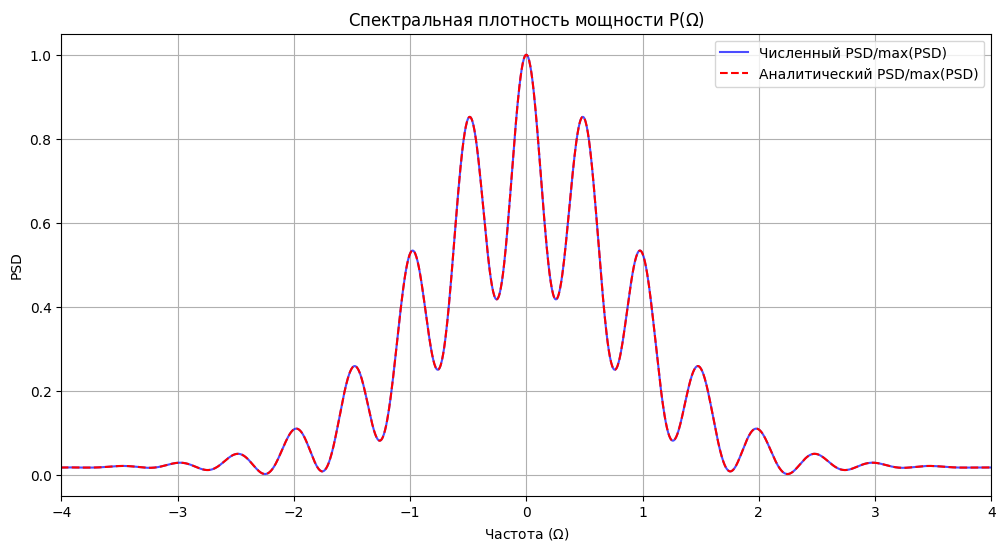

In [1036]:
# Параметры сигнала
dt = t[2] - t[1]
f_s = 1/dt
freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dt))  # Соответствующие частоты
 
psi = np.zeros((N))
psi1 = np.zeros((N))
psi2 = np.zeros((N))

for i in range(N):
  psi[i] = signal(t[i], 2*0.02*np.pi**(1/2), 0.02, 4, 0, 0) + signal(t[i], 2*0.1*np.pi**(1/2), 0.1, 6, 0, 0)
  psi1[i] = signal(t[i], 2*0.02*np.pi**(1/2), 0.02, 4, 0, 0) 
  psi2[i] = signal(t[i], 2*0.1*np.pi**(1/2), 0.1, 6, 0, 0)

# Численный спектр (FFT)
psi_fft = np.fft.fftshift(np.fft.fft(psi)) 
psi1_fft = np.fft.fftshift(np.fft.fft(psi1))  
psi2_fft = np.fft.fftshift(np.fft.fft(psi2)) 
# psd_numerical = np.abs(psi1_fft)**2 + np.abs(psi2_fft)**2
psd_numerical = np.abs(psi1_fft+psi2_fft)**2 
# psd_numerical = np.abs(psi_fft)**2

psd_numerical = psd_numerical / N
# Аналитический спектр
mask = True
# mask = freqs != 0   
# print(mask)
# psd_analytic = np.zeros(N)
psd_analytic_z1 = np.zeros(N)
psd_analytic_z2 = np.zeros(N)
# psd_analytic[mask] = analitical_power_spectr(freqs[mask]*(2*np.pi), 2*0.02*np.pi**(1/2), 0.02, 4, 0, 0) \
# + analitical_power_spectr(freqs[mask]*(2*np.pi), 2*0.1*np.pi**(1/2), 0.1, 6, 0, 0)
psd_analytic_z1 = analitical_F_z(freqs*(2*np.pi), 2*0.02*np.pi**(1/2), 0.02, 4, 0, 0) 
psd_analytic_z2 = analitical_F_z(freqs*(2*np.pi), 2*0.1*np.pi**(1/2), 0.1, 6, 0, 0)

# fffff = my_analitic_FT(freqs*(2*np.pi))
fffff = PSD_my_case_analitic(freqs*(2*np.pi))

# psd_analytic = np.abs(psd_analytic_z1+psd_analytic_z2)**2

# psd_analytic = np.abs(fffff)**2
psd_analytic = fffff

# psd_analytic[~mask] = 0  #  

# Графики
plt.figure(figsize=(12, 6))
normir_numeric = np.max(np.abs(psd_numerical))
normir_analit= np.max(np.abs(psd_analytic))
# Численный PSD
plt.plot(freqs, psd_numerical/normir_numeric, 'b-', label='Численный PSD/max(PSD)', alpha=0.7)  

# Аналитический PSD
plt.plot(freqs, psd_analytic/normir_analit, 'r--', label='Аналитический PSD/max(PSD)', linewidth=1.5)

plt.title('Спектральная плотность мощности P($\Omega$)')
plt.xlabel('Частота ($\Omega$)')
plt.ylabel('PSD')
# plt.yscale('log')  # Логарифмическая шкала для y
plt.legend()
plt.grid(True)
plt.xlim(-4, 4)  # Полный диапазон частот
plt.show()

Вейвлет преобразование с материнским вейвлетом Морле исходного сигнала:

Определение преобразования:
$$
V(\nu, t) = \nu \int\limits_{-\infty}^{\infty} dt' z(t') \psi^*(\nu(t'-t))
$$
Материнский вейвлет Морле: 
$$
\Omega_{0} = 2\pi
$$
$$ 
\psi(t) = D e^{-\frac{t^2}{2}} \left(e^{i\Omega_{0}t} - e^{-\frac{\Omega_{0}^2}{2}} \right)
$$
$$ 
D = \frac{1}{\sqrt{\sqrt{\pi}  
\left(
1
- 2  e^{-3\pi^2 }
+  e^{- 4 \pi^2} 
\right)}} 
$$

Для вычисления преобразования воспользуемся теоремой о свертке, свойств Фурье преобразования комплексно-сопряженнной функции и свойств масштабирования:
$$
V(\nu, t) = \nu\mathcal{F}^{-1}[\mathcal{F}[z(t)]\mathcal{F}[\psi^*_{\nu}]]
$$
Свойство образа от сопряженного:
$$
\mathcal{F}[f^{*}(t)](\omega) = \mathcal{F}[f(t)]^{*}(-\omega)
$$
Свойство масштабируемости:
$$
\mathcal{F}[f(at)](\omega) = \frac{1}{|a|}\mathcal{F}[f(t)](\frac{\omega}{a}) 
$$

Образ вейвлета уже известен:
$$
\tilde{\psi}(\Omega) = D  \sqrt{2\pi}\left(  e^{\frac{-(\Omega_{0} -\Omega)^2}{2}}
 - e^{-\frac{(\Omega_{0}^2 + \Omega^2)}{2}} \right) 
$$
по свойствам получаем что:
$$
\mathcal{F}[\psi^*_{\nu}](\Omega) = \mathcal{F}[\psi_{\nu}]^{*}(-\Omega) = \frac{1}{|\nu|}\mathcal{F}[\psi]^{*}(\frac{-\Omega}{\nu}) 
$$
Откуда:
$$
V(\nu, t) = sign(\nu)\mathcal{F}^{-1}[\mathcal{F}[z(t)](\Omega)\mathcal{F}[\psi]^{*}(\frac{-\Omega}{\nu}) ]
$$
где $sign(\nu)$ функция знака $\nu$

И окончательно для любого сигнала:
$$
V(\nu, t) = sign(\nu)D\mathcal{F}^{-1}\left[\mathcal{F}[z(t)](\Omega)\sqrt{2\pi}\left(e^{\frac{-(\Omega_{0} +\frac{\Omega}{\nu})^2}{2}} - e^{-\frac{(\Omega_{0}^2 + \frac{\Omega^2}{\nu^2})}{2}} \right) \right]
$$

В нашем случае:
$$
\mathcal{F}[z(t)](\Omega) = 

0.04\sqrt{\pi} e^{ -i4\Omega -0.0004\Omega^2} + 

0.2\sqrt{\pi} e^{ -i6\Omega -0.01\Omega^2} 
$$
Из линейности интеграла обратного преобразования:
$$
V(\nu, t) = sign(\nu)D 

\left(

\mathcal{F}^{-1}\left[
    
0.04\sqrt{\pi} e^{ -i4\Omega -0.0004\Omega^2} 

\sqrt{2\pi}\left(e^{\frac{-(\Omega_{0} +\frac{\Omega}{\nu})^2}{2}} - e^{-\frac{(\Omega_{0}^2 + \frac{\Omega^2}{\nu^2})}{2}} \right) 

\right] + 

\mathcal{F}^{-1}\left[

0.2\sqrt{\pi} e^{ -i6\Omega -0.01\Omega^2} 

\sqrt{2\pi}\left(e^{\frac{-(\Omega_{0} +\frac{\Omega}{\nu})^2}{2}} - e^{-\frac{(\Omega_{0}^2 + \frac{\Omega^2}{\nu^2})}{2}} \right) 

\right]

\right)
$$

Первая часть:
$$
\mathcal{F}^{-1}\left[
    
0.04\sqrt{\pi} e^{ -i4\Omega -0.0004\Omega^2} 

\sqrt{2\pi}\left(e^{\frac{-(\Omega_{0} +\frac{\Omega}{\nu})^2}{2}} - e^{-\frac{(\Omega_{0}^2 + \frac{\Omega^2}{\nu^2})}{2}} \right) 

\right] = 

$$

$$
\frac{1}{2\pi}\int\limits_{-\infty}^{\infty} d\Omega e^{i\Omega t}

0.04\pi\sqrt{2} e^{ -i4\Omega -0.0004\Omega^2} 

\left(e^{\frac{-(\Omega_{0} +\frac{\Omega}{\nu})^2}{2}} - e^{-\frac{(\Omega_{0}^2 + \frac{\Omega^2}{\nu^2})}{2}} \right) = 


$$

$$
\frac{1}{2\pi}\int\limits_{-\infty}^{\infty} d\Omega 

0.04 \sqrt{2} \pi \left(e^{\frac{-(\Omega_{0} +\frac{\Omega}{\nu})^2}{2} -i4\Omega -0.0004\Omega^2 + i\Omega t} -

e^{-\frac{(\Omega_{0}^2 + \frac{\Omega^2}{\nu^2})}{2} -i4\Omega -0.0004\Omega^2 + i\Omega t} \right) =

$$

$$
0.04 \frac{1}{\sqrt{2}} \int\limits_{-\infty}^{\infty} d\Omega 

\left(e^{-\frac{\Omega_{0}^2}{2} -\frac{\Omega_{0}\Omega}{\nu} -\frac{\Omega^2}{2\nu^2}  -i4\Omega -0.0004\Omega^2 + i\Omega t} -

e^{-\frac{\Omega_{0}^2}{2} - \frac{\Omega^2}{2\nu^2} -i4\Omega -0.0004\Omega^2 + i\Omega t} \right) =

$$

$$
0.04 \frac{1}{\sqrt{2}} \int\limits_{-\infty}^{\infty} d\Omega 

\left(e^{-\frac{\Omega^2}{2\nu^2} -0.0004\Omega^2 -\frac{\Omega_{0}^2}{2} -\frac{\Omega_{0}\Omega}{\nu} -i4\Omega  + i\Omega t} -

e^{ -\frac{\Omega^2}{2\nu^2} -0.0004\Omega^2  -\frac{\Omega_{0}^2}{2} -i4\Omega + i\Omega t} \right) =

$$

$$
0.04 \frac{1}{\sqrt{2}} \int\limits_{-\infty}^{\infty} d\Omega 

\left(e^{-((0.0004 + \frac{1}{2\nu^2})\Omega^2 +(\frac{\Omega_{0}}{\nu} + i4  - i t)\Omega + \frac{\Omega_{0}^2}{2} )} -

e^{ -((0.0004+\frac{1}{2\nu^2})\Omega^2 + i(4 - t)\Omega + \frac{\Omega_{0}^2}{2}) } \right) =

$$

$$
\int\limits_{-\infty}^{\infty}dx e^{-(ax^2+bx+c )} = \sqrt{\frac{\pi}{a}}e^{\frac{b^2}{4a}-c}
$$

$$
0.04 \frac{1}{\sqrt{2}} (\sqrt{\frac{\pi}{(0.0004 + \frac{1}{2\nu^2})}}e^{\frac{(\frac{\Omega_{0}}{\nu} + i4  - i t)^2}{4(0.0004 + \frac{1}{2\nu^2})}

-\frac{\Omega_{0}^2}{2}} - \sqrt{\frac{\pi}{(0.0004+\frac{1}{2\nu^2})}}e^{-\frac{(4 - t)^2}{4(0.0004-+\frac{1}{2\nu^2})}-\frac{\Omega_{0}^2}{2}})

$$



Вторая часть получается аналогично:
$$
\mathcal{F}^{-1}\left[

0.2\sqrt{\pi} e^{ -i6\Omega -0.01\Omega^2} 

\sqrt{2\pi}\left(e^{\frac{-(\Omega_{0} +\frac{\Omega}{\nu})^2}{2}} - e^{-\frac{(\Omega_{0}^2 + \frac{\Omega^2}{\nu^2})}{2}} \right) 

\right] = 
$$



$$
0.2 \frac{1}{\sqrt{2}} (\sqrt{\frac{\pi}{(0.01 + \frac{1}{2\nu^2})}}e^{\frac{(\frac{\Omega_{0}}{\nu} + i6  - i t)^2}{4(0.01 + \frac{1}{2\nu^2})}

-\frac{\Omega_{0}^2}{2}} - \sqrt{\frac{\pi}{(0.01+\frac{1}{2\nu^2})}}e^{-\frac{(6 - t)^2}{4(0.01+\frac{1}{2\nu^2})}-\frac{\Omega_{0}^2}{2}})
$$ 

Откуда искомое вейвлет преобразование:

$$

V(\nu, t) = sign(\nu)D \left( 
0.04 \frac{1}{\sqrt{2}} \sqrt{\frac{\pi}{(0.0004 + \frac{1}{2\nu^2})}}\left(e^{\frac{(\frac{\Omega_{0}}{\nu} + i4  - i t)^2}{4(0.0004 + \frac{1}{2\nu^2})}
-\frac{\Omega_{0}^2}{2}} - e^{-\frac{(4 - t)^2}{4(0.0004+\frac{1}{2\nu^2})}-\frac{\Omega_{0}^2}{2}}\right) + \right.
$$
$$
\left. 0.2 \frac{1}{\sqrt{2}} \sqrt{\frac{\pi}{(0.01 + \frac{1}{2\nu^2})}}\left(e^{\frac{(\frac{\Omega_{0}}{\nu} + i6  - i t)^2}{4(0.01 + \frac{1}{2\nu^2})}
-\frac{\Omega_{0}^2}{2}} - e^{-\frac{(6 - t)^2}{4(0.01+\frac{1}{2\nu^2})}-\frac{\Omega_{0}^2}{2}}\right) \right)

$$

$$

V(\nu, t) = sign(\nu)D e^{-\frac{\Omega_{0}^2}{2}}\left( 
0.04 \frac{1}{\sqrt{2}} \sqrt{\frac{\pi}{(0.0004 + \frac{1}{2\nu^2})}}\left(e^{\frac{(-\frac{\Omega_{0}}{\nu} - i4  + i t)^2}{4(0.0004 + \frac{1}{2\nu^2})}} - e^{-\frac{(t-4)^2}{4(0.0004+\frac{1}{2\nu^2})}}\right) + \right.
$$
$$
\left. 0.2 \frac{1}{\sqrt{2}} \sqrt{\frac{\pi}{(0.01 + \frac{1}{2\nu^2})}}\left(e^{\frac{(-\frac{\Omega_{0}}{\nu} - i6  + i t)^2}{4(0.01 + \frac{1}{2\nu^2})}} - e^{-\frac{(t-6)^2}{4(0.01+\frac{1}{2\nu^2})}}\right) \right)

$$


И его квадрат модуля:
$$

V(\nu, t)V(\nu, t)^* = \frac{1}{2} D^2 e^{-\Omega_{0}^2}

\left( 
0.04  \sqrt{\frac{\pi}{(0.0004 + \frac{1}{2\nu^2})}}\left(e^{\frac{(-\frac{\Omega_{0}}{\nu} - i4  + i t)^2}{4(0.0004 + \frac{1}{2\nu^2})}} - e^{-\frac{(t-4)^2}{4(0.0004+\frac{1}{2\nu^2})}}\right) + \right.
$$
$$
\left. 0.2  \sqrt{\frac{\pi}{(0.01 + \frac{1}{2\nu^2})}}\left(e^{\frac{(-\frac{\Omega_{0}}{\nu} - i6  + i t)^2}{4(0.01 + \frac{1}{2\nu^2})}} - e^{-\frac{(t-6)^2}{4(0.01+\frac{1}{2\nu^2})}}\right) \right) 

\left( 
0.04 \sqrt{\frac{\pi}{(0.0004 + \frac{1}{2\nu^2})}}\left(e^{\frac{(-\frac{\Omega_{0}}{\nu} + i4  - i t)^2}{4(0.0004 + \frac{1}{2\nu^2})}} - e^{-\frac{(t-4)^2}{4(0.0004+\frac{1}{2\nu^2})}}\right) + \right.
$$
$$
\left. 0.2  \sqrt{\frac{\pi}{(0.01 + \frac{1}{2\nu^2})}}\left(e^{\frac{(-\frac{\Omega_{0}}{\nu} + i6  - i t)^2}{4(0.01 + \frac{1}{2\nu^2})}} - e^{-\frac{(t-6)^2}{4(0.01+\frac{1}{2\nu^2})}}\right) \right) 
$$

Расписсывать весьма не удобно

Далее что бы не тратить время на вычисление построим график спектра мощности вейвлет преобразования как $V(\nu, t)V(\nu, t)^*$ для всех элементов по рассчитанному аналитически образу просто на каждом шаге итерации помножая его на комплексно сопряженного себя же


In [1037]:
@nb.njit
def exp1_my(a, b, t, nuu, omeg_0):
    
    complex_part = (-omeg_0/nuu + 1j*(t - b))**2
    
    real_part = 4*(a + (1/(2*nuu**2)))
    
    rez = np.exp( complex_part / real_part)
    
    return rez

@nb.njit
def exp2_my(a, b, t, nuu, omeg_0):
    
        up_part = 1j*(t-b)
        
        down_part = 4*(a + 1/(2*(nuu**2)))
        
        rez = np.exp( up_part**2 / down_part)
        
        return rez

@nb.njit
def calculate_formula(D, Omega0, nu, t):
    if nu == 0:
        return 0
    
    rezz =  np.sign(nu) * np.exp( - (Omega0**2)/2) * D * (
        
            0.04/np.sqrt(2.0)*(np.sqrt(np.pi/(0.0004+(1/(2*nu**2))))) * 
                           
            (exp1_my(0.0004, 4.0, t, nu, Omega0) - exp2_my(0.0004, 4.0, t, nu, Omega0)) 
                           
            +
                           
            0.2/np.sqrt(2.0)*(np.sqrt(np.pi / (0.01 + (1/(2*nu**2))))) *
                           
            (exp1_my(0.01, 6.0, t, nu, Omega0) - exp2_my(0.01, 6.0, t, nu, Omega0)) )
    
    return rezz

@nb.njit(parallel=True)
def analitic_wavelet_my(N):
    om_0 = 2*np.pi
        
    D = 1/np.sqrt(np.sqrt(np.pi)*(1-2*np.exp(-((3/4)*om_0**2))+np.exp(-(om_0**2))))

    # N = 1000

    nu = np.linspace(start=0.0, stop=15, num=N)

    t_int_p = 10
    t_int_m = 0

    t = np.linspace(t_int_m, t_int_p, N)

    V_analiticl = np.zeros((N,N), dtype=np.complex128)

    for i in nb.prange(N):
        for j in nb.prange(N):
            V_analiticl[i,j] = calculate_formula(D, om_0, nu[j], t[i])
            V_analiticl[i,j] = V_analiticl[i,j] * np.conj(V_analiticl[i,j])
            
    return V_analiticl, nu, t

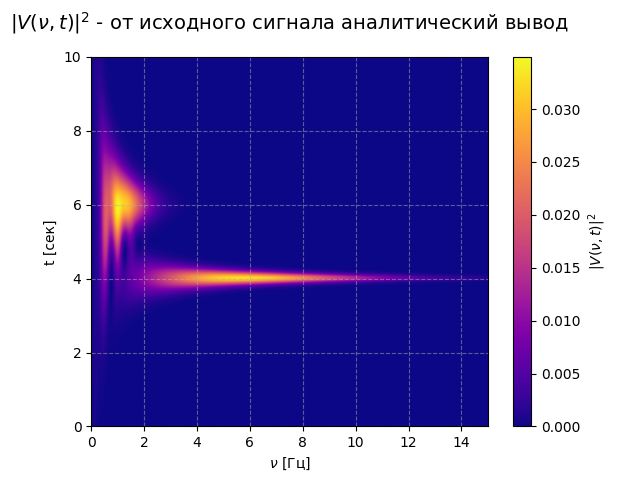

In [1038]:
vvv, nu, t = analitic_wavelet_my(1000)

plt.imshow(
    np.real(vvv), #реальная часть берется из за специфики структуры данных вся мнимая часть масива равна 0
    extent=[nu[0], nu[-1], t[0], t[-1]],  # границы осей
    origin='lower',  # начало координат снизу
    aspect='auto',    # автоматический масштаб осей
    cmap='plasma'
)

plt.title("$|V(\\nu,t)|^2$ - от исходного сигнала аналитический вывод", fontsize=14, pad=20)
plt.xlim(0, 15)
plt.ylim(0, 10)
plt.colorbar( label='$|V(\\nu,t)|^2$')
plt.xlabel("$ \\nu $ [Гц]")
plt.ylabel("t [сек]")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

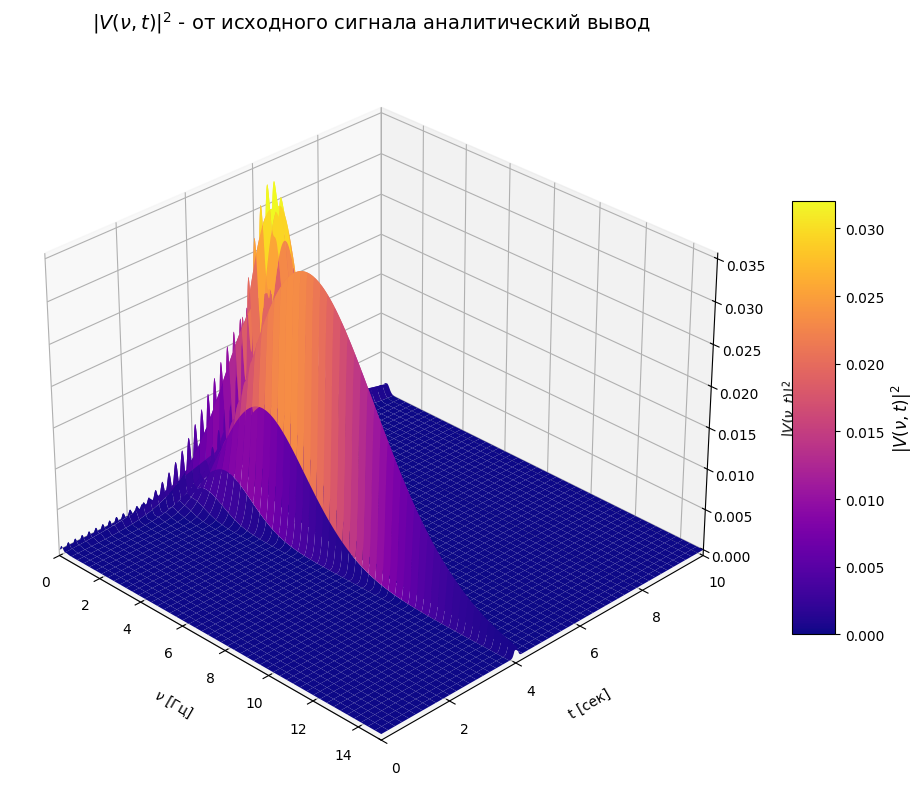

In [1039]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.real(vvv), 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("$|V(\\nu,t)|^2$ - от исходного сигнала аналитический вывод", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=30, azim=-45)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

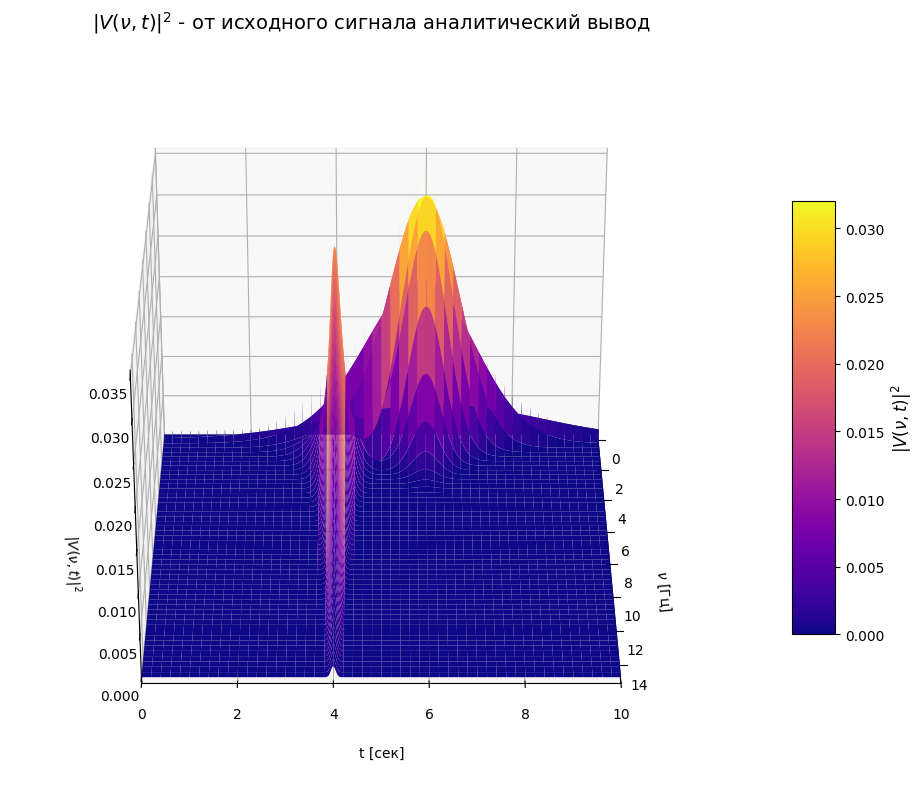

In [1040]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.real(vvv), 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("$|V(\\nu,t)|^2$ - от исходного сигнала аналитический вывод", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=30, azim=-0)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

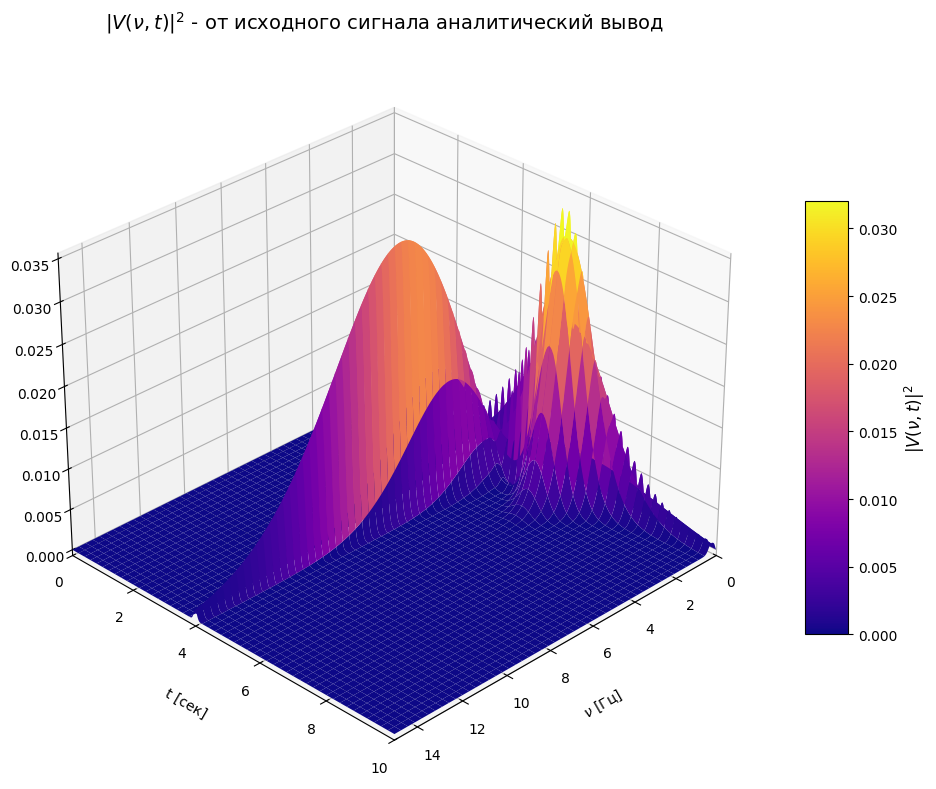

In [1041]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.real(vvv), 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("$|V(\\nu,t)|^2$ - от исходного сигнала аналитический вывод", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=30, azim=45)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

Анализ чисто численной схемы вейвлет преобразования с материнским вейвлетом Морле:

Алгоритм численного расчета такой же как и для аналитики, имея аналитическое выражение Фурье образа вейвлета умножаем его на соответствующий образ сигнала по теореме о свертке и от полученного результат делаем обратное преобразование фурье, что и будет являться результатом вычисленья вейвлет преобразования и при этом будет достаточно оптимальным с точки зрения вычислений в отличии от алгоритма прямой свертки.
Так же алгоритм подразумевает возможность параллельных вычислений, что реализовано в функции.

In [1042]:
# установить для работы np.fft с jit компилятором:
# pip install rocket-fft

In [1043]:
@nb.njit
def test_signal_1(t):
    if t > 2 or t < 0:
        return 0
    elif t >= 0 and t <= 1:
        return np.sin(2*np.pi*4*t)
    else:
        return np.sin(2*np.pi*8*t)

8192


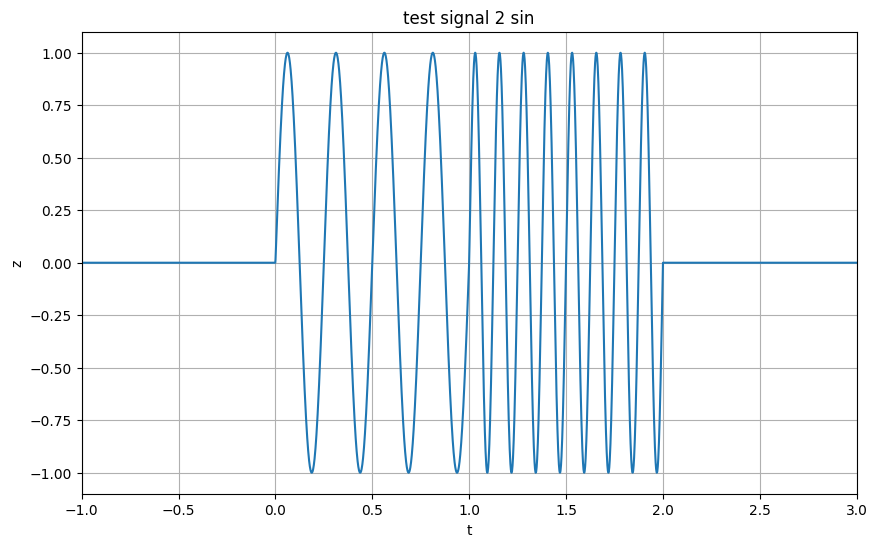

In [1044]:
N = 2**13
print(N)
t = np.linspace(start=-5, stop=5, num=N)
test_1 = np.zeros((N), dtype=np.float64)

for i in range(N):
    test_1[i] = test_signal_1(t[i])

plt.figure(figsize=(10, 6))
plt.plot(t, test_1)
plt.title("test signal 2 sin")
plt.xlabel("t")
plt.ylabel("z")
plt.grid()
plt.xlim(-1, 3)
plt.show()

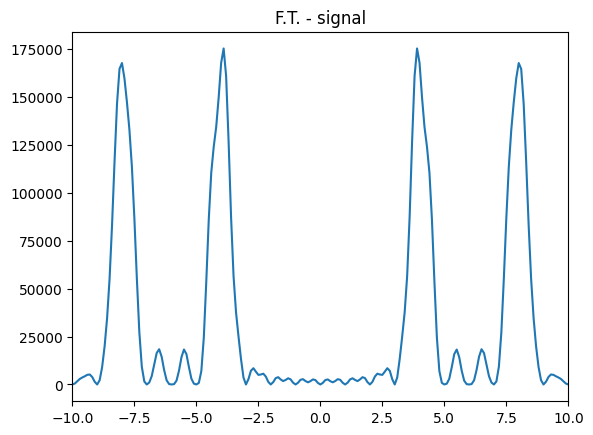

In [1045]:
plt.plot(np.fft.fftshift(np.fft.fftfreq(N, d=t[2] - t[1])), np.abs(np.fft.fftshift(np.fft.fft(test_1)))**2)
plt.title("F.T. - signal")
plt.xlim(-10, 10)
plt.show()

In [1046]:
@nb.njit
def Morle_wave(arg):
    
    om_0 = 2*np.pi
    
    D_m = 1/np.sqrt(np.sqrt(np.pi)*(1-2*np.exp(-((3/4)*om_0**2))+np.exp(-(om_0**2))))
    
    psi = D_m*np.exp(-(1/2)*(arg**2))*(np.exp((1j*om_0*arg)) - np.exp(-(1/2)*(om_0**2)))
    
    return psi

In [1047]:
@nb.njit
def Morle_wave_ft(w):
    
    om_0 = 2*np.pi
    
    D = 1/np.sqrt(np.sqrt(np.pi)*(1-2*np.exp(-((3/4)*om_0**2))+np.exp(-(om_0**2))))
    
    term1 = np.sqrt(2*np.pi)*np.exp(-(1/2)*(om_0-w)**2)
    
    term2 = -np.sqrt(2*np.pi)*np.exp(-(1/2)*(w)**2 - (1/2)*om_0**2)
    
    return  (term1 + term2)*D

In [1048]:
@nb.njit(parallel=True)
def wawlet_transform_numerical(signal, dt, nu_min, nu_max, nu_N):
    
    # задаем длинну массива
    N = len(signal)
    
    # создаем частоты для фурье образ
    freqs = np.fft.fftshift(np.fft.fftfreq(N, d=dt))
    
    # записываем фурье образ сигнала
    signal_fft = np.fft.fftshift(np.fft.fft(signal))
    
    # создаем массив частот вейвлета
    nu = np.linspace(start=nu_min, stop=nu_max, num=nu_N)
    
    # задаем массив фурье образов материнского вейвлета для всех частот вейвлет - преобразования
    morle_ft_arr = np.zeros((N, nu_N), dtype=np.complex128)
    
    # задаем массив искомого вейвлет образа 
    V_transform = np.zeros((N, nu_N), dtype=np.complex128)
    
    for i in nb.prange(nu_N):
        # вычисляем массив фурье образа вейвлета для всех ню 
        if nu[i] == 0:
            morle_ft_arr[:,i] = 0
        morle_ft_arr[:,i] = np.sign(nu[i])*np.conj(Morle_wave_ft(-2*np.pi*freqs / nu[i]))[:] #*np.sqrt(np.abs(nu[i]))
        
        # по теореме о свертке вычисляем фурье образ для всех ню
        V_transform[:, i] = morle_ft_arr[:,i] * signal_fft[:]
        
        # возвращаем обратное преобразование фурье, являющейся искомым вейвлет преобразованием
        # V_transform[:, i] = np.fft.fftshift(np.fft.ifft(V_transform[:, i]))/(2*np.pi)
        V_transform[:, i] = np.fft.ifft(V_transform[:, i])#/(2*np.pi)
    
    return V_transform, nu
    

In [1049]:
test_3, nu = wawlet_transform_numerical(test_1, t[2] - t[1], 2, 10, N)

Для синусов в принципе получаю что и ожидаем 2 частоты в соответствующее время

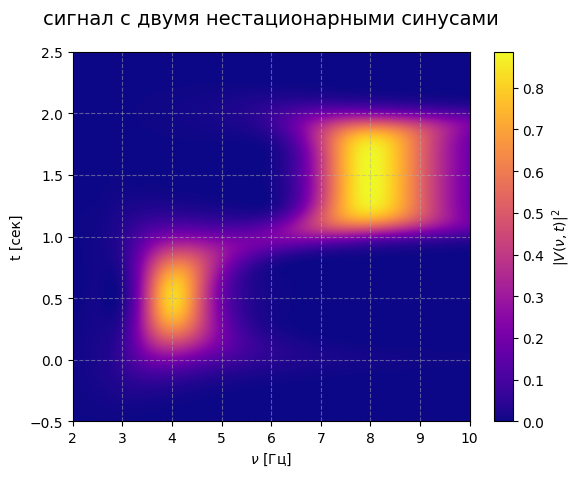

In [1050]:
plt.imshow(
    np.abs(test_3)**2, 
    extent=[nu[0], nu[-1], t[0], t[-1]],  # границы осей
    origin='lower',  # начало координат снизу
    aspect='auto',    # автоматический масштаб осей
    cmap='plasma'
)

plt.title("сигнал с двумя нестационарными синусами", fontsize=14, pad=20)
plt.xlim(2, 10)
plt.ylim(-0.5, 2.5)
plt.colorbar(label='$|V(\\nu,t)|^2$')
plt.xlabel("$ \\nu $ [Гц]")
plt.ylabel("t [сек]")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

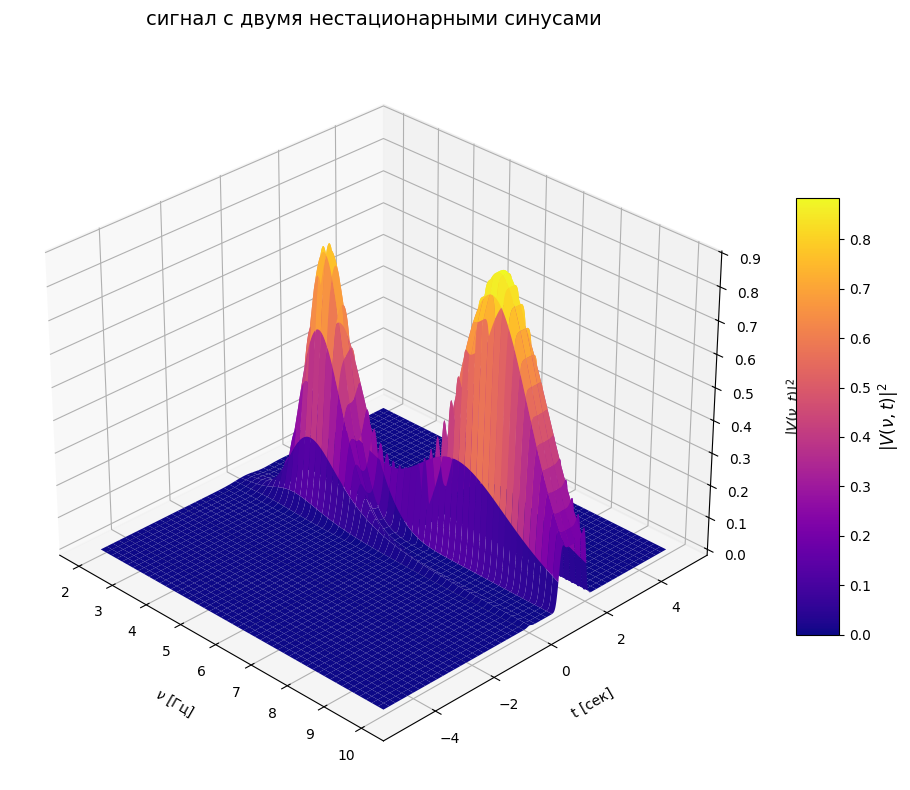

In [1051]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.abs(test_3)**2, 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("сигнал с двумя нестационарными синусами", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
# ax.set_xlim(2, 10)
# ax.set_ylim(-0.5, 2.5)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=30, azim=-45)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

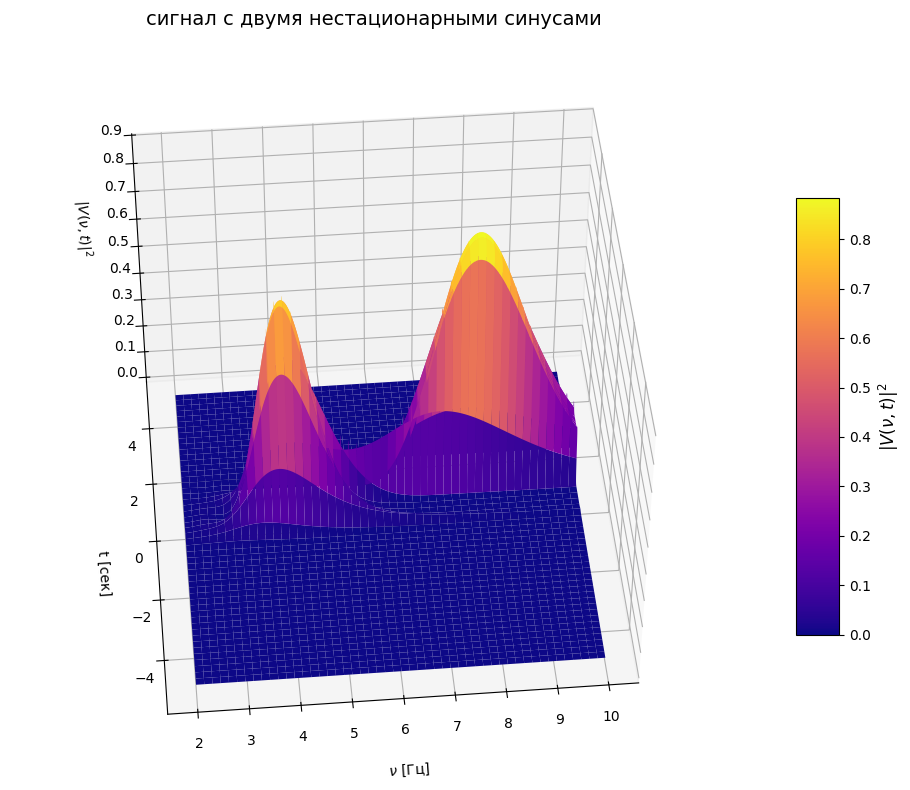

In [1052]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.abs(test_3)**2, 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("сигнал с двумя нестационарными синусами", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
# ax.set_xlim(2, 10)
# ax.set_ylim(-0.5, 2.5)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=45, azim=-95)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

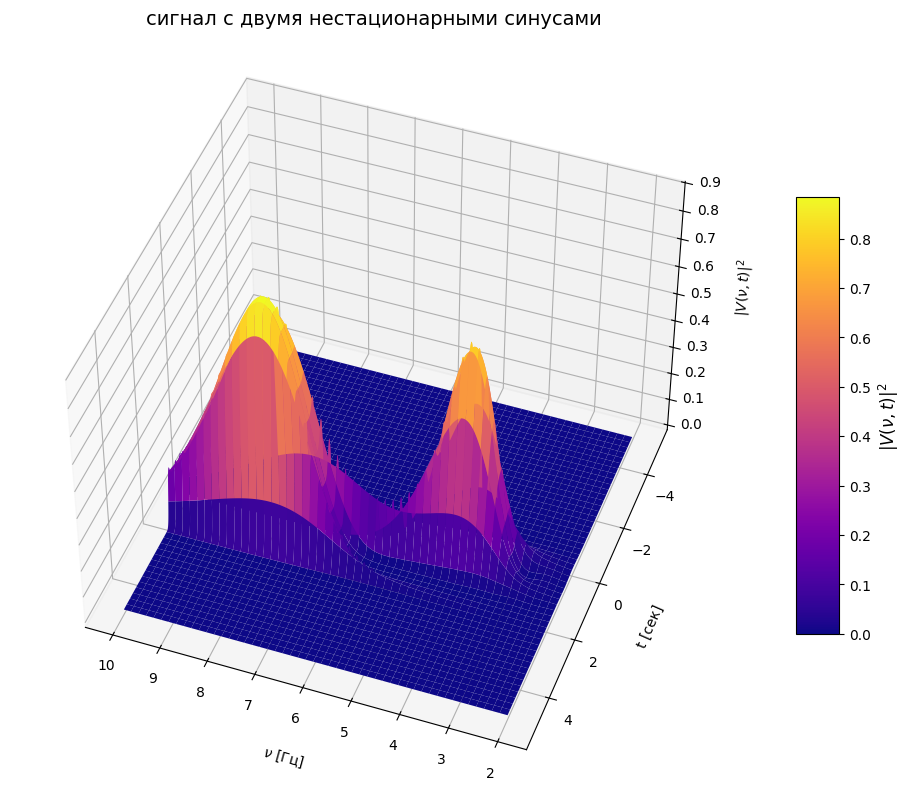

In [1053]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.abs(test_3)**2, 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("сигнал с двумя нестационарными синусами", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
# ax.set_xlim(0, 10)
# ax.set_ylim(-0.5, 2.5)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=45, azim=110)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

сугубо численное вейвлет - преобразование заданного сигнала из двух экспонент:

In [1054]:
N = 1000
print(N)

t_int_p = 10
t_int_m = 0

t = np.linspace(t_int_m, t_int_p, N)

z_1_time = signal(t, 2*0.02*np.pi**(1/2), 0.02, 4, 0, 0)
z_2_time = signal(t, 2*0.1*np.pi**(1/2), 0.1, 6, 0, 0)

z = z_1_time + z_2_time

dt = t[2] - t[1]

V_1, nu = wawlet_transform_numerical(z_1_time, dt, 0, 15, N)
V_2, nu = wawlet_transform_numerical(z_2_time, dt, 0, 15, N)

V = V_1 + V_2
    


1000


In [1055]:
V_test_137, nu = wawlet_transform_numerical(z, dt, 0, 15, N)

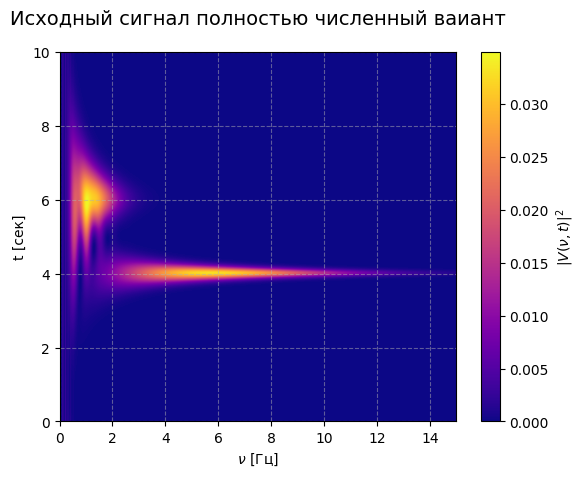

In [1056]:
plt.imshow(
    np.abs(V_test_137)**2, 
    extent=[nu[0], nu[-1], t[0], t[-1]],  # границы осей
    origin='lower',  # начало координат снизу
    aspect='auto',    # автоматический масштаб осей
    cmap='plasma'
)

plt.title("Исходный сигнал полностью численный ваиант", fontsize=14, pad=20)
plt.xlim(0, 15)
plt.ylim(0, 10)
plt.colorbar(label='$|V(\\nu,t)|^2$')
plt.xlabel("$ \\nu $ [Гц]")
plt.ylabel("t [сек]")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

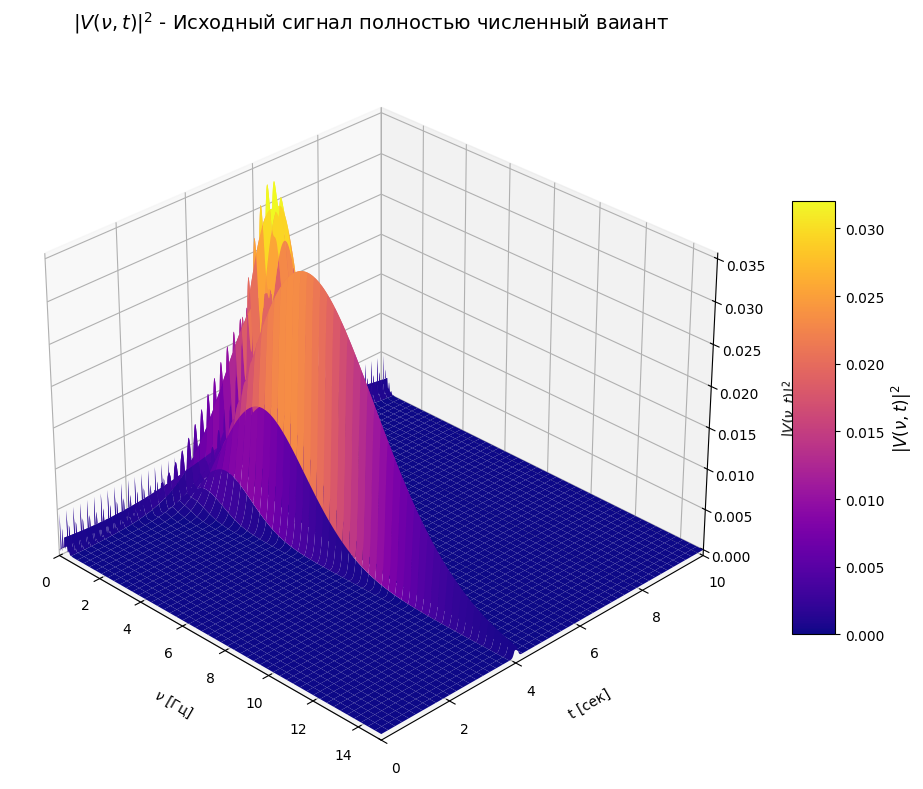

In [1057]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.abs(V_test_137)**2, 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("$|V(\\nu,t)|^2$ - Исходный сигнал полностью численный ваиант", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=30, azim=-45)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

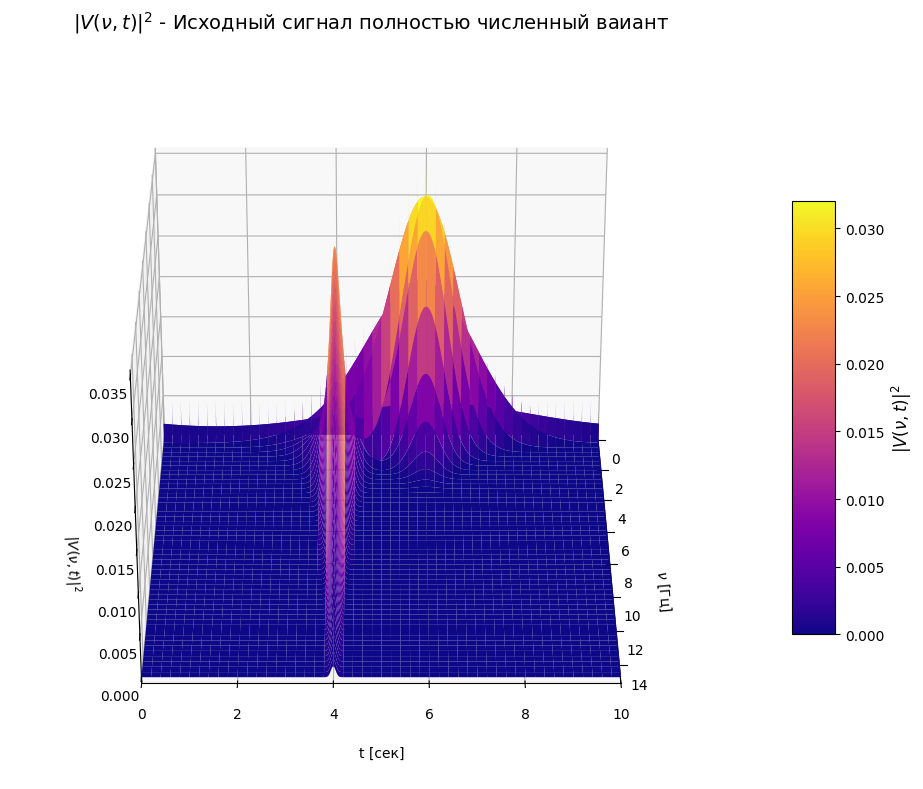

In [1058]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.abs(V_test_137)**2, 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("$|V(\\nu,t)|^2$ - Исходный сигнал полностью численный ваиант", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=30, azim=-0)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

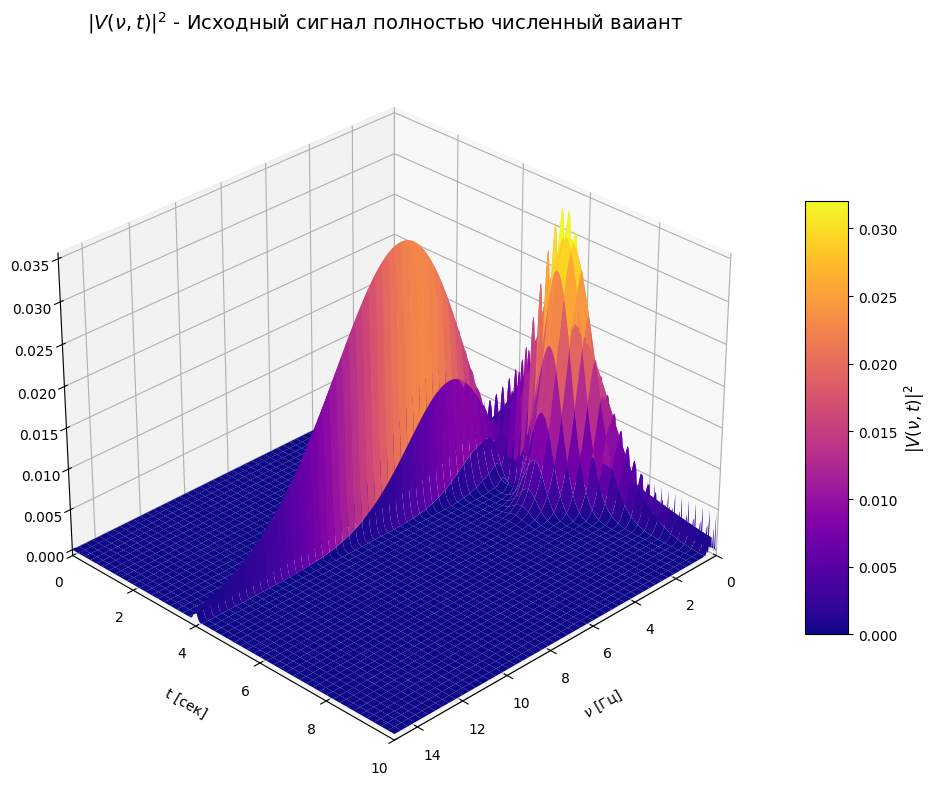

In [1059]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.abs(V_test_137)**2, 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("$|V(\\nu,t)|^2$ - Исходный сигнал полностью численный ваиант", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
ax.set_xlim(0, 15)
ax.set_ylim(0, 10)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=30, azim=45)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()

Сравнение двух методов рядом:

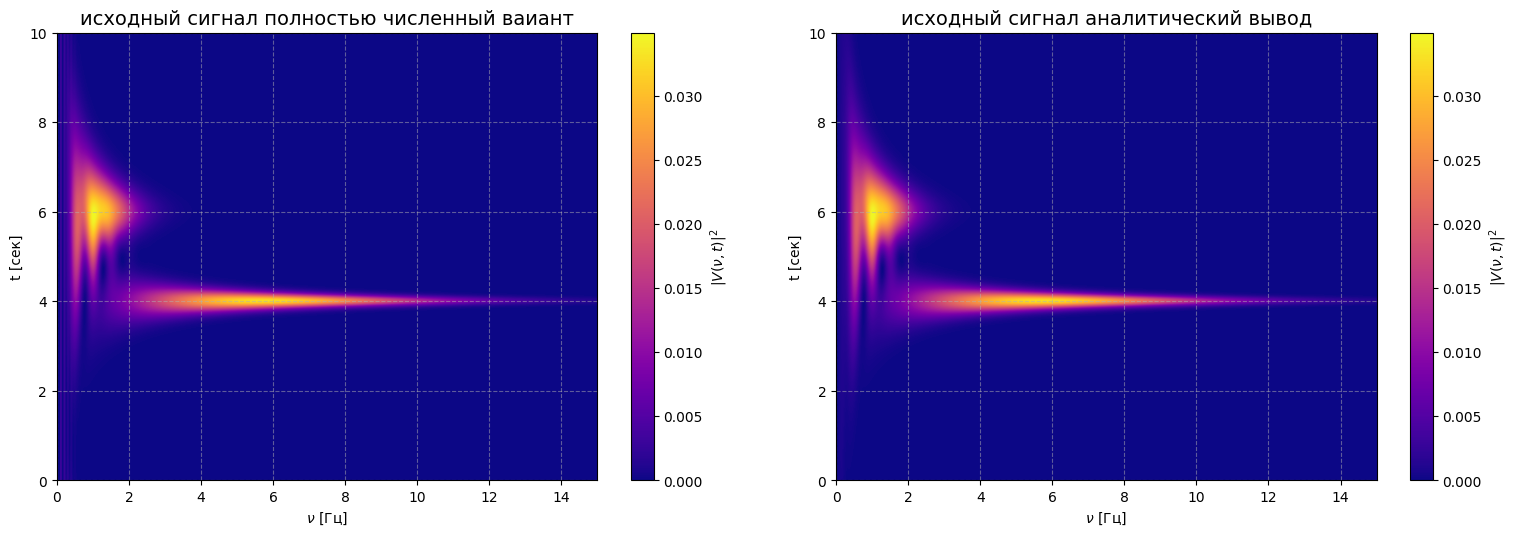

In [1060]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

im1 = ax1.imshow(
    np.abs(V_test_137)**2, 
    extent=[nu[0], nu[-1], t[0], t[-1]],
    origin='lower',
    aspect='auto',
    cmap='plasma'
)
ax1.set_title("исходный сигнал полностью численный ваиант", fontsize=14)
ax1.set_xlim(0, 15)
ax1.set_ylim(0, 10)
ax1.set_xlabel("$ \\nu $ [Гц]")
ax1.set_ylabel("t [сек]")
ax1.grid(True, linestyle='--', alpha=0.5)
fig.colorbar(im1, ax=ax1, label='$|V(\\nu,t)|^2$')

im2 = ax2.imshow(
    np.real(vvv),  
    extent=[nu[0], nu[-1], t[0], t[-1]],  
    origin='lower',
    aspect='auto',
    cmap='plasma'
)
ax2.set_title("исходный сигнал аналитический вывод", fontsize=14)
ax2.set_xlim(0, 15)
ax2.set_ylim(0, 10)
ax2.set_xlabel("$ \\nu $ [Гц]")
ax2.set_ylabel("t [сек]")
ax2.grid(True, linestyle='--', alpha=0.5)
fig.colorbar(im2, ax=ax2, label='$|V(\\nu,t)|^2$')

plt.tight_layout(pad=3.0) 
plt.show()

Тестовая попытка обработать реальный сигнал.

Имеется запись известного гитарного рифа группы Deep Purple, запись звука была на одой струне с известными нотам и их частотами попробуем сопоставить то что выдает вейвлет анализ и реальную запись.

ноты простые на 6 струне большой октавы, пойдем по тактам [ми - соль - ля], [ми - соль - Си-бемоль - ля], [ми - соль - ля - соль - ми]
для справки из материала [https://www.gitaristam.ru/school/frequency.htm] - можно узнать какие частоты соответствуют нотам.

In [1061]:
# загрузим запись
# pip install librosa
import librosa
import sounddevice as sd
import scipy.signal

загружаем запись

In [1062]:
# target_sr = (953)
target_sr = 42000
audio, original_sr = librosa.load(
    "deep_test.m4a",
    sr=target_sr,  # Автоматический ресемплинг
    mono=True      # Объединение каналов в моно (опционально)
)

print(f"Новая частота: {target_sr} Гц")
print(f"Количество сэмплов: {len(audio)}")

Новая частота: 42000 Гц
Количество сэмплов: 361032


/var/folders/d_/6vn8y5s14553bk_6c2v7y1wr0000gn/T/ipykernel_46951/831641942.py:3: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, original_sr = librosa.load(
/Users/vladimirnikiforov/Documents/stady/fdt/venv/lib/python3.12/site-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


dt 2.380952380952381e-05
t 8.596
361032


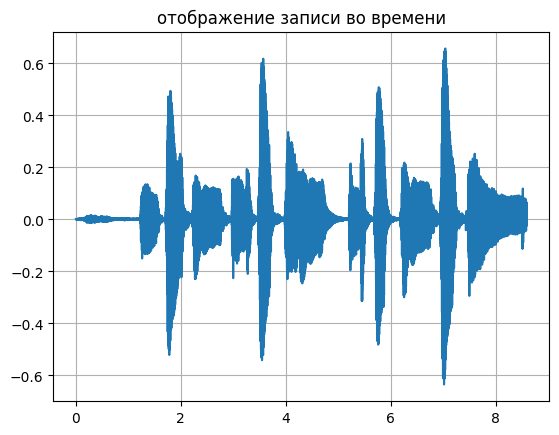

In [1063]:
print("dt", 1/target_sr)
print("t", len(audio)/target_sr)
print(len(audio))
t = np.linspace(0, len(audio)/target_sr, len(audio))
W = np.fft.fftshift(np.fft.fftfreq(len(audio), d=1/original_sr))
plt.plot(t, audio)
plt.title("отображение записи во времени")
plt.grid()
plt.show()

Отфильтруем запись что бы избавиться от помех, используя фильтр Баттерворта

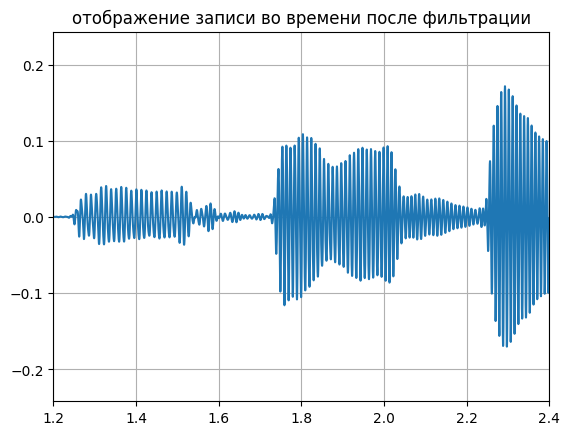

In [1064]:
lowcut = 70 
highcut = 150  
nyquist = 0.5 * target_sr
low = lowcut / nyquist
high = highcut / nyquist

order = 3  
b, a = scipy.signal.butter(
    N=order, 
    Wn=[low, high], 
    btype='band'
)

filtered_audio = scipy.signal.filtfilt(b, a, audio)

plt.plot(t, filtered_audio)
plt.title("отображение записи во времени после фильтрации")
plt.xlim(1.2, 2.4)
plt.grid()
plt.show()

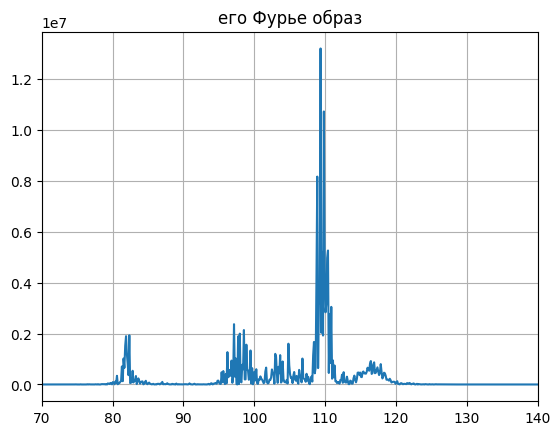

In [1065]:
fft_gitar_filtred = np.fft.fftshift(np.fft.fft(filtered_audio))
plt.plot(W, np.abs(fft_gitar_filtred)**2)
plt.title("его Фурье образ")
plt.xlim(70, 140)
# plt.xlim(105, 115)
plt.grid()
plt.show()

Видно что необходимо выровнять частоты чтобы корректно увидеть отображение на спектре мощьности, для этого возпльзуемся известной любому гитаристу вещью "перегрузом", что строго говоря прото являеться срезом амплитуды.

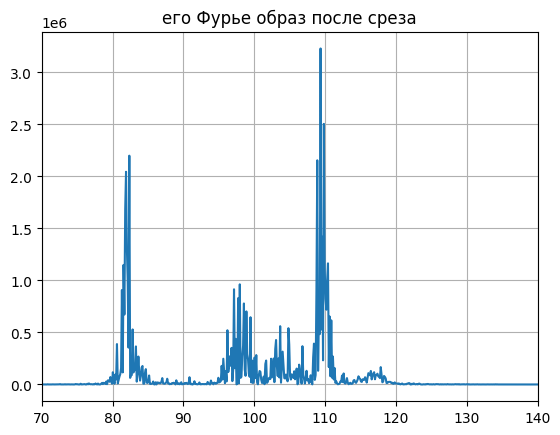

In [1066]:
@nb.njit
def reg_kernal(sig1):
    if np.abs(sig1) > 0.036:
        return 0.05*np.sign(sig1)
    else:
        return sig1

@nb.njit(parallel=True)
def reg(sig):
    num = len(sig)
    rez = np.zeros((num), dtype=np.float64)
    for i in nb.prange(0, num):
        rez[i] = reg_kernal(sig[i])
    return rez
        
test = reg(filtered_audio)
        
fft_gitar_filtred = np.fft.fftshift(np.fft.fft(test))
plt.plot(W, np.abs(fft_gitar_filtred)**2)
plt.title("его Фурье образ после среза")
plt.xlim(70, 140)
plt.grid()
plt.show()

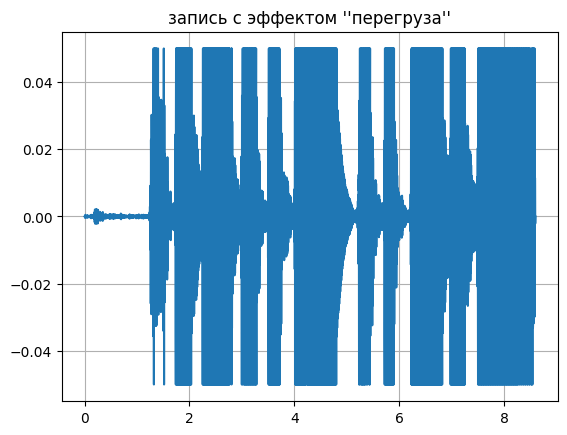

In [1067]:
plt.plot(t, test)
plt.title("запись с эффектом ''перегруза''")
plt.grid()
plt.show()

при наличии соответствующих библиотек можно прослушать получившуюся запись, она действительно стала звучать как электро гитара

In [1068]:
# Воспроизведение
# sd.play(test, samplerate=target_sr)
# sd.wait()

найдем вейвлет образ

In [1069]:
V_test_real_record, nu = wawlet_transform_numerical(test, 1/original_sr, 65, 160, 100)

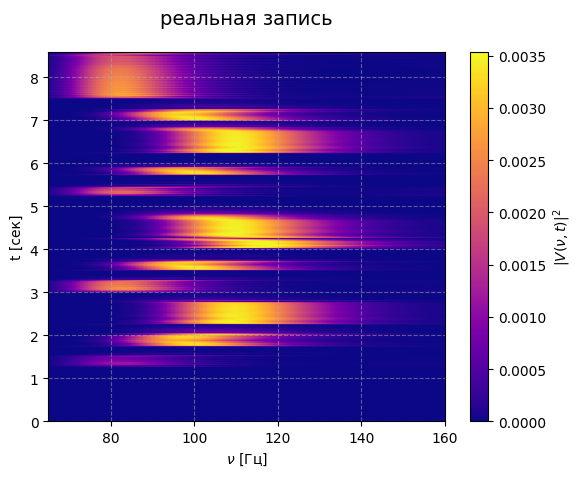

In [1070]:
plt.imshow(
    np.abs(V_test_real_record)**2, 
    extent=[nu[0], nu[-1], t[0], t[-1]],  # границы осей
    origin='lower',  # начало координат снизу
    aspect='auto',    # автоматический масштаб осей
    cmap='plasma',
    # vmax=0.002
)

plt.title("реальная запись", fontsize=14, pad=20)
# plt.xlim(70, 90)
# plt.ylim(1, 2)
plt.colorbar(label='$|V(\\nu,t)|^2$')
plt.xlabel("$ \\nu $ [Гц]")
plt.ylabel("t [сек]")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

и как итог отметим частоты явно

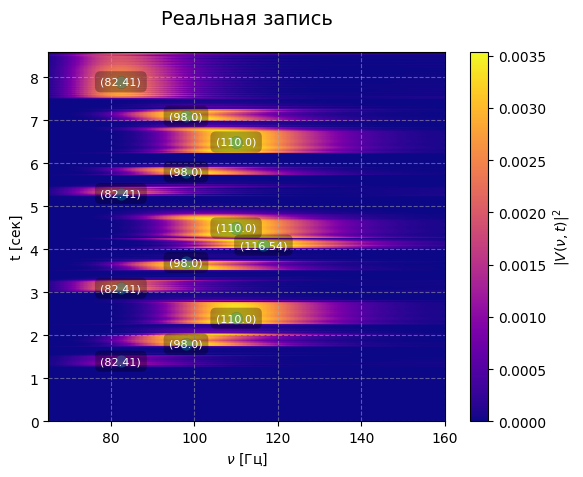

In [1071]:
nu_points = [82.41, 98.00, 110.00, 82.41, 98.00, 116.54, 110.00, 82.41, 98.00, 110.00, 98.00, 82.41] #(Гц)
t_points = [1.4, 1.8, 2.4, 3.1, 3.7, 4.1, 4.5, 5.3, 5.8, 6.5, 7.1, 7.9]       #  (сек)

im = plt.imshow(
    np.abs(V_test_real_record)**2, 
    extent=[nu[0], nu[-1], t[0], t[-1]],
    origin='lower',
    aspect='auto',
    cmap='plasma',
)

# Добавляем точки и подписи
for i, (x, y) in enumerate(zip(nu_points, t_points)):
    plt.scatter(x, y, s=80, color='cyan', edgecolors='black', linewidths=0.2, zorder=4, alpha=0.3 )  # s - размер точки
    plt.text(
        x, y, 
        f"({x})",             # Текст подписи (координаты)
        color='white',              # Цвет текста
        fontsize=8,                # Размер шрифта
        ha='center', va='center',   # Выравнивание по центру точки
        bbox=dict(                  # Фон подписи
            boxstyle='round,pad=0.5',
            facecolor='black',
            alpha=0.3,
            edgecolor='none'
        ),
        zorder=5              # Рисовать поверх других элементов
    )

plt.title("Реальная запись", fontsize=14, pad=20)
plt.colorbar(im,label='$|V(\\nu,t)|^2$')
plt.xlabel("$ \\nu $ [Гц]")
plt.ylabel("t [сек]")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

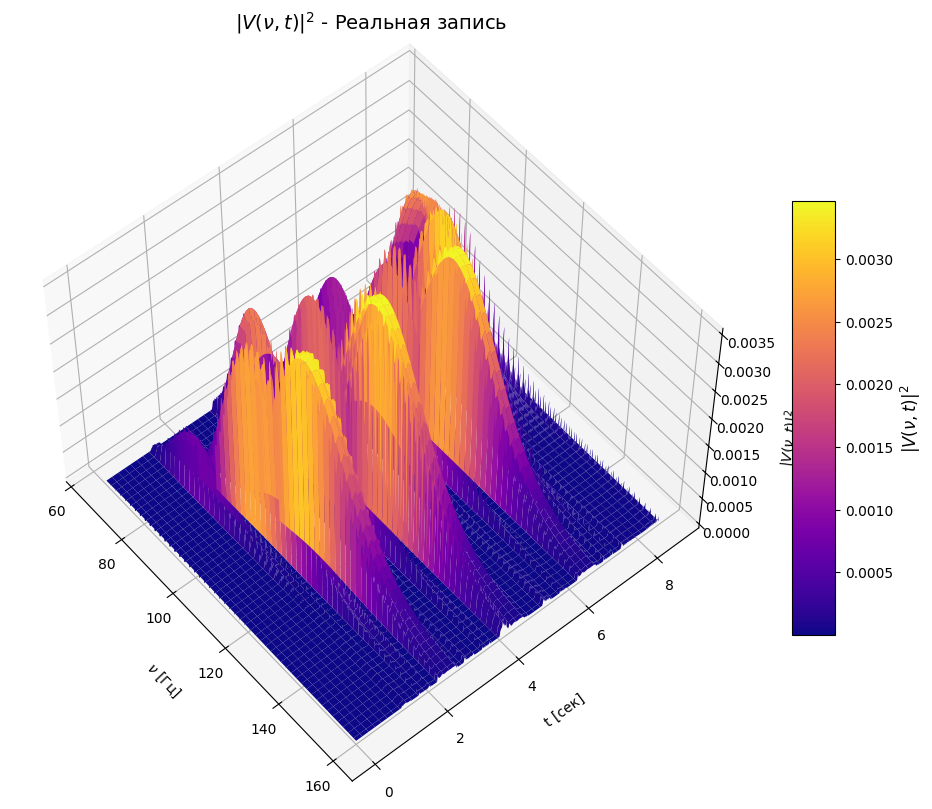

In [1072]:
T, Nu = np.meshgrid(t, nu, indexing='ij')

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface(
    Nu,        
    T,           
    np.abs(V_test_real_record)**2, 
    cmap='plasma',
    edgecolor='none',
    alpha=1,
    antialiased=True
)

ax.set_title("$|V(\\nu,t)|^2$ - Реальная запись", fontsize=14, pad=20)
ax.set_xlabel("$ \\nu $ [Гц]", labelpad=12)
ax.set_ylabel("t [сек]", labelpad=12)
ax.set_zlabel("$|V(\\nu,t)|^2$", labelpad=12)
cbar = fig.colorbar(surf, ax=ax, shrink=0.6, aspect=10)
cbar.set_label("$|V(\\nu,t)|^2$", fontsize=12)
ax.view_init(elev=55, azim=-40)
ax.grid(True, linestyle='--', alpha=1)
plt.tight_layout()
plt.show()